# Malaria Visualization

## Getting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotnine import *

In [2]:
url_m_death = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv"
url_m_death_age = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv"
url_m_inc = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv"
m_death = pd.read_csv(url_m_death)
m_death_age = pd.read_csv(url_m_death_age)
m_inc = pd.read_csv(url_m_inc)

In [3]:
d = 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'
m_death = m_death.rename({d:'Death per 100,000 people'}, axis = 1)

In [4]:
m_death_age = m_death_age.drop(columns = "Unnamed: 0")

In [5]:
i = 'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)'
m_inc = m_inc.rename({i:'Incidence per 1,000 people'}, axis = 1)

## 1. Malaria deaths by country

### First glimpse on data

By the fact that most countries malaria death rates are extremely low, we only focus on top 50 countries regarding to death rate each year.

First we look at the overall malaria deaths condition year by year. We can see that the deaths rate mean is generally descreasing over years (first increasing and then decreasing), indicating that the overall condition is getting better. We can get the same conclusion from quartiles and the min/max of deaths rate.

Besides average death rate, we also want to know the skewness of death rate over years, which indicating the degree of asymmetry of distribution. We may also curious about the distribution of malaria death rate across countries, and which countries' malaria condition is sever.

I will make four subplots to demonstrate above information:

- The average death rate over years (demonstrate the overall condition over years)
- The distribution of death rate over countries (demonstrate the overall condition over countries)
- The skewness of death rate over years (demonstrate the degree of asymmetry of death rate over years)
- The number of times being in the top10/5 countries regarding of death rate (demonstrate countries that malaria condition is sever)


In [6]:
m_death_sub = (
    m_death.groupby('Year').
    apply(lambda x: x.sort_values('Death per 100,000 people', ascending=False)).
    drop(columns = 'Year').
    reset_index().
    drop(columns = 'level_1').
    groupby('Year').head(50)
)

In [7]:
m_death_sub.groupby('Year').describe()

Death per 100,000 people                                              \
                        count       mean        std        min        25%   
Year                                                                        
1990                     50.0  77.351108  49.885427   8.270012  34.590975   
1991                     50.0  78.735268  50.480732  10.445692  35.979347   
1992                     50.0  78.540006  50.542716  10.899944  33.298084   
1993                     50.0  79.083429  51.340283  10.574466  33.796796   
1994                     50.0  79.397155  51.677383   9.552076  34.318643   
1995                     50.0  80.245312  52.057230   9.667513  35.314949   
1996                     50.0  81.216735  52.500463  12.421970  35.339003   
1997                     50.0  80.840838  52.362384  10.877103  35.219120   
1998                     50.0  82.232997  53.138885  12.504268  36.049508   
1999                     50.0  83.641208  52.784626  12.576315  40.385242   
2000                     50.0  85.223809  51.814041  13.076183  41.334349   
2001                     50.0  86.422614  52.167623  14.761826  43.652374   
2002                     50.0  86.383674  53.101212  12.272105  43.850898   
2003                     50.0  86.962757  54.298487  11.869317  46.087723   
2004                     50.0  85.743293  55.671687  11.267334  41.470426   
2005                     50.0  82.349454  55.570952  10.963618  36.840356   
2006                     50.0  77.976933  54.288295  10.668801  31.344833   
2007                     50.0  74.302477  55.157138   9.697858  27.099147   
2008                     50.0  70.265057  55.190279   8.077900  19.986524   
2009                     50.0  65.588412  52.217151   7.817882  19.366665   
2010                     50.0  61.958522  49.935975   7.271249  18.557802   
2011                     50.0  58.406120  48.109205   4.623298  17.275831   
2012                     50.0  54.889613  44.936580   4.515529  17.141516   
2013                     50.0  52.380686  41.616738   4.935059  17.843703   
2014                     50.0  50.055917  38.841758   4.841673  16.609904   
2015                     50.0  48.348179  37.619653   4.602371  16.032529   
2016                     50.0  46.942794  36.403034   4.575349  15.818903   

                                         
            50%         75%         max  
Year                                     
1990  74.590649  105.494008  202.993349  
1991  76.563970  109.626755  205.391713  
1992  75.821680  114.456834  201.330893  
1993  75.508834  118.830383  200.555566  
1994  73.734521  117.747908  198.295668  
1995  75.958075  117.838263  195.041205  
1996  73.682089  117.941338  192.120695  
1997  73.613679  116.357061  190.215616  
1998  75.798974  118.311611  197.601205  
1999  78.770381  121.214850  204.270436  
2000  79.470576  119.204662  207.808763  
2001  81.932928  122.882790  215.368304  
2002  83.331307  125.094773  224.397285  
2003  78.168820  123.196586  228.210095  
2004  71.732270  130.062507  229.228881  
2005  64.164641  124.600556  225.557218  
2006  54.137646  121.984161  217.833737  
2007  50.379086  121.274702  214.626602  
2008  45.246979  118.433726  211.158649  
2009  43.520451  109.887271  194.789507  
2010  42.265837  104.984673  179.864739  
2011  41.872756   92.123783  170.581079  
2012  39.345125   84.428008  161.489987  
2013  38.338587   77.891127  149.818189  
2014  37.121922   74.434777  141.505393  
2015  37.378038   70.465162  139.622110  
2016  36.255527   68.257234  135.088376

### Prepare data for plot

In [8]:
# f1_1 data
death_mean = m_death_sub.groupby('Year').agg('mean').reset_index()
d_r_q = [death_mean.iloc[:,1].quantile(x) for x in np.linspace(0,1,5)]
d_r_q[0] -= 1
d_r_q[-1] += 1
death_mean = death_mean.assign(Severity =  pd.cut(death_mean.iloc[:,1], d_r_q, labels = False))

In [9]:
# f1_2 data
death_distr = m_death_sub.groupby('Entity').agg('mean').reset_index()

In [10]:
# f1_3 data
death_skew = m_death_sub.groupby('Year').agg('skew').reset_index().rename({'Death per 100,000 people':'Skewness'}, axis = 1)

In [11]:
# f1_4 data
death_top = m_death_sub.assign(Rank = [x + 1 for y in range(len(m_death_sub.Year.unique())) for x in range(50)])
death_top10 = (
    death_top.groupby('Year').
    head(10).Code.value_counts().to_frame().rename({'Code':'Top10'}, axis = 1)
)
death_top5 = (
    death_top.groupby('Year').
    head(5).Code.value_counts().to_frame().rename({'Code':'Top5'}, axis = 1)
)
death_top = (
    pd.merge(death_top5, death_top10, left_index=True, right_index = True, how = 'right').fillna(0).
    sort_values(['Top5','Top10'])
)

### Create plot

Text(0.5, 0, 'Times of being in top10/5 death rate countries')

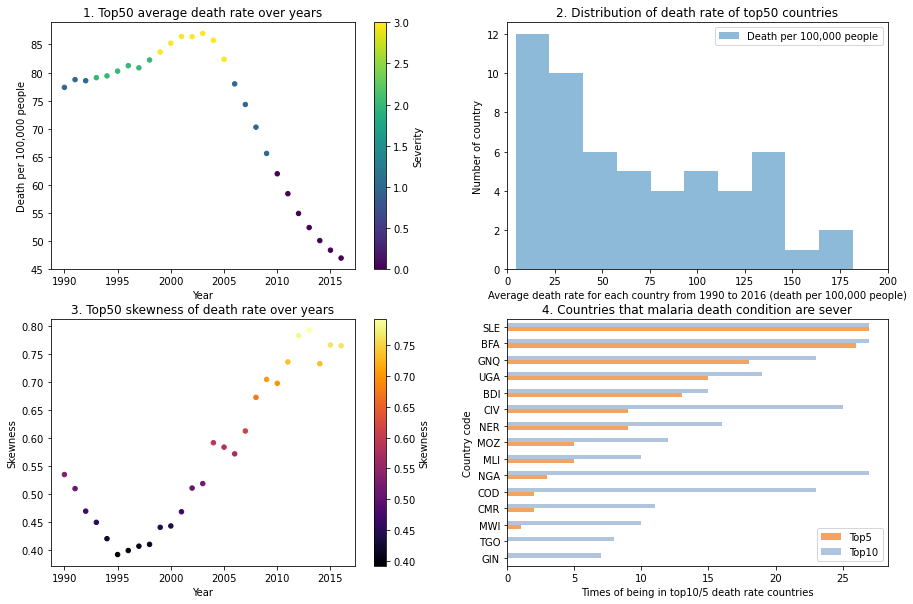

In [12]:
fig1, axes = plt.subplots(2,2,figsize=(15, 10))
f1_1 = death_mean.plot(x = 'Year', y = 'Death per 100,000 people', kind = 'scatter',
                title = '1. Top50 average death rate over years',
                s = 20, c = 'Severity', colormap = 'viridis', ax = axes[0][0])
f1_2 = death_distr.plot(y = 'Death per 100,000 people', kind = 'hist',
                 title = '2. Distribution of death rate of top50 countries', xlim = (0,200),
                 alpha = 0.5, ax = axes[0][1])
f1_2.set_ylabel('Number of country')
f1_2.set_xlabel('Average death rate for each country from 1990 to 2016 (death per 100,000 people)')
f1_3 = death_skew.plot(x = 'Year', y = 'Skewness', kind = 'scatter', 
               title = '3. Top50 skewness of death rate over years',
               s = 20, c = 'Skewness', colormap = 'inferno', ax = axes[1][0])
f1_4 = death_top.plot(y = ['Top5', 'Top10'], kind = 'barh',
               title = '4. Countries that malaria death condition are sever',
               color = ['#F4A460', '#B0C4DE'], ax = axes[1][1])
f1_4.set_ylabel('Country code')
f1_4.set_xlabel('Times of being in top10/5 death rate countries')

### Analysis of plot

From plot 1, we can see that the overall condition of death rate caused by malaria is generally getting better over years, while the most sever period is from 2000 to 2005. Plot 2 tells us that the distribution of top50 countries' death rate is positively skewed, and plot 3 shows the the degree skewness is getting higher over years, indicating that in mild condition region death rate is decreasing faster than that of in sever condition region, so more effort should be placed in those sever condition region. Plot 4 demonstrates that SLE, BFA are the most sever condition region, countries like GNQ, UGA, BDI etc. are also worth paying attention to.

## 2. Malaria deaths by age

### First glimpse on data

From `m_death_age` dataset, since the deaths data is recorded in absolute figure so it makes no sense to compare the value between countries (e.g. A country have 100,000 population and 100 deaths, B country have 100,000,000 population and 1000 deaths). However, we can use the data to figure out the structure of malaria deaths by ages.  There are two thing we may curious about: the overall age structure and the changing in age structure by years.

For the similar reason in visualization 1, I will extract the top50 deaths data for each years and each age group.

For the first question, we can create violionplot to show how the overall distribution of deaths across different countries and years for each age group. Besides that, I also curious about how it looks like of total deaths for each year in different age group, so I create a boxplot to show that. 

For the second questoin, we may create an area plot which demonstrates the cumulative death for each year with different color in different age groups. It will clearly shows how the deaths structure (i.e. the proportion of death for different age groups) developed over the last 27 years.

In [13]:
m_death_age_sub = (
    m_death_age.groupby(['year', 'age_group']).
    apply(lambda x: x.sort_values('deaths', ascending=False)).
    drop(columns = ['year', 'age_group']).
    reset_index().
    drop(columns = 'level_2').
    groupby(['year', 'age_group']).head(30)
)
col_names = [x.title() for x in m_death_age_sub.columns]
m_death_age_sub.columns = col_names

In [14]:
m_death_age_sub.filter(['Deaths','Age_Group']).groupby('Age_Group').describe()

Deaths                                                           \
             count           mean            std          min           25%   
Age_Group                                                                     
15-49        810.0    9951.956486   15275.481131   622.476723   1499.627436   
5-14         810.0   12358.371513   19386.995206   529.359522   1451.105232   
50-69        810.0    5750.990889    8985.701584   364.370415    823.473028   
70 or older  810.0    3585.758565    5703.835097   201.218565    495.632003   
Under 5      810.0  106105.985594  176121.468690  2939.391459  10181.579450   

                                                        
                      50%           75%            max  
Age_Group                                               
15-49         3286.429160   9646.719676   78710.192455  
5-14          2745.548351  14820.691020   91583.975140  
50-69         1620.704245   5507.871699   43481.110009  
70 or older   1034.593433   3249.713971   27165.882882  
Under 5      22471.815101  89020.645363  752025.548675

In [15]:
m_death_age_sub.filter(['Year','Age_Group','Deaths']).groupby(['Year','Age_Group']).describe()

Deaths                                            \
                  count          mean            std          min   
Year Age_Group                                                      
1990 15-49         30.0   7031.479923   10517.690358   622.476723   
     5-14          30.0  10357.566018   15986.929806   767.843211   
     50-69         30.0   4200.385637    6470.652828   364.370415   
     70 or older   30.0   2336.635683    3657.579580   201.218565   
     Under 5       30.0  94145.417489  154281.164055  6513.428239   
...                 ...           ...            ...          ...   
2016 15-49         30.0  10294.768287   15973.547307  1057.979956   
     5-14          30.0  10427.858828   16795.949627   529.359522   
     50-69         30.0   6136.627348    9581.162939   487.427624   
     70 or older   30.0   4000.554794    6296.149822   305.208129   
     Under 5       30.0  84291.263823  144720.330428  3259.248185   

                                                                          
                          25%           50%           75%            max  
Year Age_Group                                                            
1990 15-49         943.390895   2786.120692   8172.730820   48275.169475  
     5-14         1109.317300   2617.554959  14429.069216   68752.585590  
     50-69         612.474086   1093.278011   4314.357573   27720.578684  
     70 or older   333.429337    735.471854   1559.616372   15103.452338  
     Under 5      9289.498205  18735.628316  68143.184270  586161.122620  
...                       ...           ...           ...            ...  
2016 15-49        1789.710629   2801.909488   9243.620675   69181.523171  
     5-14         1260.973031   2245.377328   9270.103083   66900.805566  
     50-69         974.000788   1553.741527   6211.066716   40516.069944  
     70 or older   674.746484    993.416365   3863.261896   26055.802074  
     Under 5      7093.450891  18374.296953  65690.139173  516897.263977  

[135 rows x 8 columns]

### Prepare data for plot

In [16]:
# f2_1 data
death_age = (
    m_death_age_sub.filter(['Year','Deaths','Age_Group']).
    assign(Year_n =  m_death_age_sub.groupby(['Year','Age_Group']).cumcount().astype('int')).
    pivot_table(index = ['Year', 'Year_n'], columns = 'Age_Group', values = 'Deaths').
    reset_index().drop(['Year', 'Year_n'], axis = 1)
)
death_age.index.name = 'n'
death_age.columns.name = 'Age Group'
age_group_ordered = [death_age.columns[x] for x in [4,1,0,2,3]]

death_age_sum = (
    m_death_age_sub.filter(['Year','Deaths','Age_Group']).
    pivot_table(index = 'Year', columns = 'Age_Group', values = 'Deaths', aggfunc = 'sum')
)

year = death_age_sum.index

In [17]:
# f2_2_1 data
death_age_cum = death_age_sum[age_group_ordered]
for i in range(death_age_cum.shape[1] - 1):
    death_age_cum.iloc[:,i + 1] += death_age_cum.iloc[:,i] 
year = death_age_cum.index
death_age_cum_ = death_age_cum.assign(zero = 0)

In [18]:
# f2_2_2 data
death_age_prop = death_age_sum.apply(lambda x: x / sum(x) ,axis = 1)
death_age_prop = death_age_prop[age_group_ordered]

### Create plot

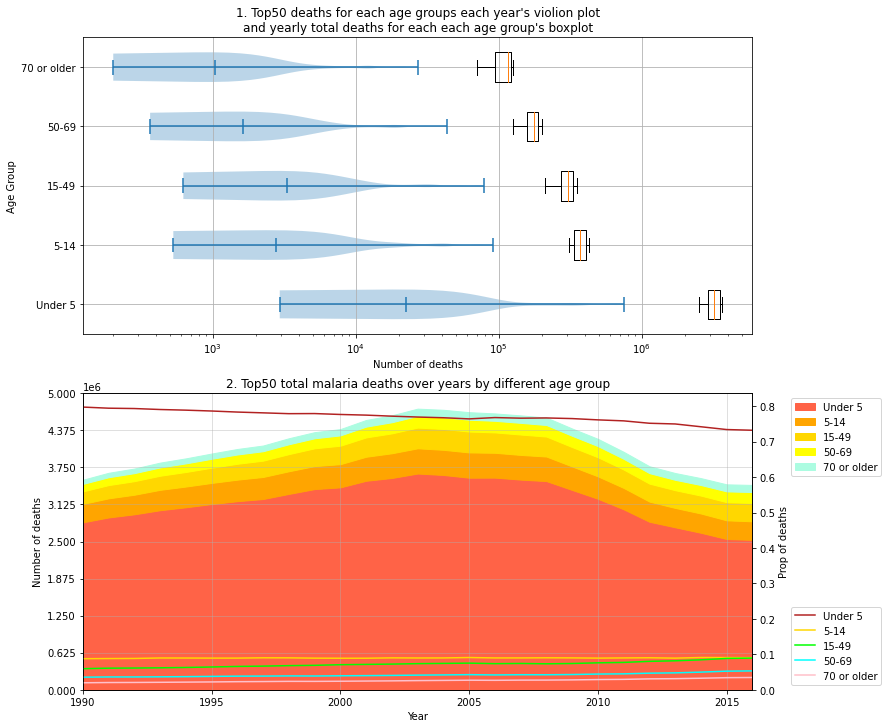

In [19]:
fig2 = plt.figure(2, figsize=(12, 12))

f2_1 = plt.subplot(2,1,1)
plt.violinplot([death_age[x] for x in age_group_ordered],
               showmedians=True, vert = False)
plt.boxplot([death_age_sum[x] for x in age_group_ordered],
            labels = age_group_ordered, vert = False)
plt.title('1. Top50 deaths for each age groups each year\'s violion plot\nand yearly total deaths for each each age group\'s boxplot')
plt.xlabel('Number of deaths')
plt.xscale('log')
plt.ylabel('Age Group')
plt.grid(b = True, axis = 'both')

f2_2_1 = plt.subplot(2,1,2)
color1 = ['#FF6347', '#FFA500', '#FFD700', '#FFFF00', '#ACFCE1']
for i in range(death_age_cum_.shape[1] - 1):
    plt.fill_between(x = year, y1 = death_age_cum_.iloc[:,i - 1], y2 = death_age_cum_.iloc[:,i], color = color1[i],
                    label = age_group_ordered[i])
plt.title('2. Top50 total malaria deaths over years by different age group')
plt.xlim(left = 1990, right = 2016)
plt.xlabel('Year')
plt.ylim(bottom = 0)
plt.ylabel('Number of deaths')
plt.yticks(np.linspace(0, 5*1e6, 9))
plt.grid(b = True, axis = 'both', alpha = 0.5)
plt.legend(loc = 'upper right', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

f2_2_2 = f2_2_1.twinx()
color2 = ['#B22222', '#FFD700', '#00FF00', '#00FFFF', '#FFC0CB']
for i in range(death_age_prop.shape[1]):
    plt.plot(death_age_prop.iloc[:,i], label = age_group_ordered[i], c = color2[i])
plt.ylim(bottom = 0)
plt.ylabel('Prop of deaths')
plt.legend(loc = 'lower right', bbox_to_anchor=(0.7, 0, 0.5, 0.5))
plt.show()

### Analysis of plot

From the plot 1 we can easily tell that the people under 5 was the main part of deaths caused by malaria, and the deaths number decrease as age grows. Thouhg it is not robust to make the conclusion that malaria is less danger to older people than to younger people, since age groups' population vary, it is clear that we should care more about children under 5 years when facing malaria.

From the plot 2 we can see that the gerenal trend of total deaths of malaria is going up and then going down, and the propotion of deaths for under 5 year group is decreasing over years, while the proportion of deaths for 15 - 49 years group is slowly increasing, indicating that after years endeavor, children under 5's condition is getting better.

## 3. Malaria incidence by country

This dataset's structure is similar to the fisrt dataset, with less content and the deaths rate being replaced by incidence rate. So I would like to focus on trying to use `theme_xkcd()` in `plotnine` to make the plot cooler.

As before, we first subset the dataset to keep only significant value. In this visualization, I would like to make a density plot to show the distribution of incidence rate for 4 years.

In [20]:
m_inc_sub = (
    m_inc.groupby('Year').
    apply(lambda x: x.sort_values('Incidence per 1,000 people', ascending=False)).
    drop(columns = 'Year').
    reset_index().
    drop(columns = 'level_1').
    groupby('Year').head(50)
)
m_inc_sub.groupby('Year').describe()

Incidence per 1,000 people                                      \
                          count        mean         std         min   
Year                                                                  
2000                       50.0  435.869559  210.480457  231.900000   
2005                       50.0  342.302508  115.662817  142.500000   
2010                       50.0  271.375185  124.017695  106.200000   
2015                       50.0  212.879522   92.301588   82.573627   

                                               
             25%         50%      75%     max  
Year                                           
2000  346.828569  420.655423  481.150  1741.0  
2005  263.175000  323.532084  445.675   549.8  
2010  174.550000  246.861483  364.925   601.4  
2015  133.725000  203.569187  265.850   448.6

### Create plot

In [21]:
inc_distr = m_inc_sub
fig3 = (
    ggplot(inc_distr, aes(x = 'Incidence per 1,000 people', color = 'Year', fill = 'Year')) +
    geom_density() +
    facet_wrap('~Year', 4) +
    scale_x_continuous(limits = (0,1000)) +
    labs(title = 'Density of incidence rate in different years') +
    theme_xkcd()
)

/Users/yuehan/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_density : Removed 1 rows containing non-finite values.


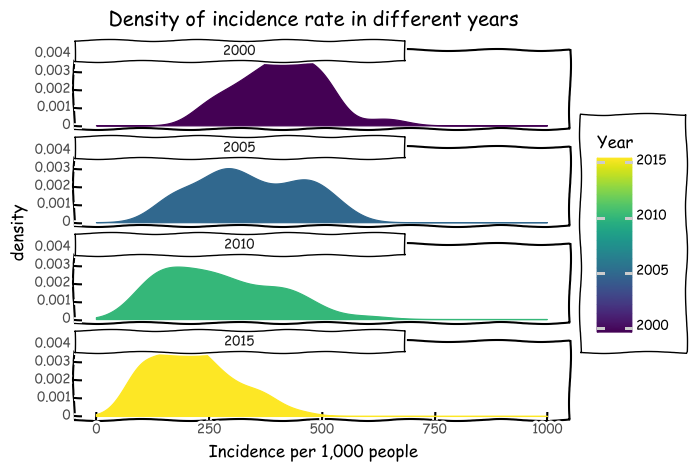

<ggplot: (8782963051695)>

In [22]:
fig3

### Analysis of plot

As shown above, we can see that from 2000 to 2015, the incidence rate is generally decreasing: in 2000, the highest density is around 500, while in 2015, the highest density is below 250. So we can say that the risk of being inffected by malaria is overall reduced.